In [37]:
import mido
import numpy as np
import matplotlib.pyplot as plt
import Parser

In [38]:
dataset = Parser.load_dataset("adl-piano-midi")

In [39]:
songs = Parser.files_to_songs(dataset["Reggae"])

In [40]:
type(songs)
for song in songs:
    print(type(song))
    print(songs[song])

<class 'str'>
[[0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 67, 0, 0], [0, 58, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 60, 0, 768], [0, 56, 0, 0], [0, 67, 0, 0], [0, 63, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 58, 0, 0], [0, 67, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [1, 79, 68, 0], [1, 79, 0, 0], [1, 84, 72, 0], [1, 86, 80, 0], [1, 84, 0, 0], [1, 91, 68, 0], [1, 86, 0, 0], [0, 67, 0, 0], [0, 60, 0, 0], [0, 56, 0, 0], [1, 96, 72, 0], [0, 63, 0, 0], [1, 91, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [1, 91, 72, 0], [1, 96, 0, 0], [1, 91, 0, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 67, 0, 0], [0, 58, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 60, 0, 768], [0, 56, 0, 0], [0, 67, 0, 0], [0, 63, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0

In [41]:
def extract_notes(songs):
    matrix = []
    for song in songs :
        l = [0]*len(songs[song])
        for i,seq in enumerate(songs[song]) :
            l[i]=seq[1]
        matrix.append(l)
    return matrix

In [42]:
notes = extract_notes(songs)

In [43]:
def create_dict(notes):
    flatt_notes = [element for n in notes for element in n]

    dict_notes = {}
    for note in flatt_notes:
        if note not in dict_notes:
            dict_notes[note] = len(dict_notes)
    return dict_notes

In [44]:
create_dict(notes)

{58: 0,
 62: 1,
 63: 2,
 67: 3,
 56: 4,
 60: 5,
 79: 6,
 84: 7,
 86: 8,
 91: 9,
 96: 10,
 74: 11,
 77: 12,
 82: 13,
 87: 14,
 72: 15,
 89: 16,
 59: 17,
 65: 18,
 75: 19,
 41: 20,
 46: 21,
 48: 22,
 55: 23,
 70: 24,
 44: 25,
 61: 26,
 68: 27,
 51: 28,
 29: 29,
 57: 30,
 28: 31,
 31: 32,
 32: 33,
 33: 34,
 45: 35,
 64: 36,
 53: 37,
 38: 38,
 50: 39,
 36: 40,
 35: 41,
 47: 42,
 34: 43,
 26: 44,
 54: 45,
 43: 46,
 66: 47,
 52: 48,
 69: 49,
 27: 50,
 39: 51,
 76: 52,
 40: 53,
 83: 54,
 80: 55,
 37: 56,
 71: 57,
 49: 58,
 73: 59,
 81: 60,
 24: 61,
 88: 62,
 85: 63,
 78: 64,
 42: 65,
 90: 66,
 92: 67,
 93: 68,
 98: 69,
 30: 70,
 101: 71,
 103: 72,
 104: 73,
 105: 74,
 94: 75,
 95: 76,
 100: 77,
 97: 78}

In [45]:
##C'est applati mais c'est du reggae donc ok ? on pourra découper après ? pck c'était pas évident sinon pour la taille du training set

In [46]:
def one_hot_encoding_train(dict_notes, training_set):
    one_hot_training = np.zeros((training_set.shape[0], training_set.shape[1], len(dict_notes)))
    for i in range(training_set.shape[0]):
        for j in range(training_set.shape[1]):
            one_hot_training[i,j, dict_notes[training_set[i,j]]] = 1
    return one_hot_training


In [47]:
def one_hot_encoding(dict_notes,notes):
    k = len(dict_notes)
    one_hot = np.zeros((len(notes), k))
    for i in range(len(notes)):
        one_hot[i][dict_notes[notes[i]]] = 1
    return one_hot


In [48]:
def treat_notes(notes):
    return [element for n in notes for element in n]


In [49]:
flatt_notes = treat_notes(notes)
dict_notes = create_dict(notes)
flatt_notes = np.array(flatt_notes)
notes_one_hot = one_hot_encoding(dict_notes,flatt_notes)

In [50]:
notes_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
notes_one_hot.shape

(64740, 79)

In [52]:
def create_train_label_notes_only(notes):
    training_set = []
    label_set = []
    for i in range(len(notes)-5):
        training_set.append(notes[i:i+5])
        label_set.append(notes[i+5])
    return training_set, label_set

In [53]:
def create_weight(notes):
    # Calculer les poids en fonction de la fréquence des notes
    note_counts = {}
    for note in notes:
        for element in note:
            if element in note_counts:
                note_counts[element] += 1
            else:
                note_counts[element] = 1
    
    # Calculer les poids pour chaque note
    total_notes = sum(note_counts.values())
    weights = {note: count/total_notes for note, count in note_counts.items()}
    
    return weights

In [54]:
weights = create_weight(notes)

In [55]:
training_set, label_set = create_train_label_notes_only(flatt_notes)
training_set = np.array(training_set)
label_set = np.array(label_set)

In [56]:
from imblearn.over_sampling import SMOTE
#implement SMOTE for imbalanced learning , decrease precision

# Créer une instance de SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)

# Appliquer SMOTE sur les données
X_resampled, y_resampled = smote.fit_resample(training_set, label_set)

In [57]:
def ind_to_notes(dict_notes):
    return {v: k for k, v in dict_notes.items()}


In [58]:
print(training_set.shape)

(64735, 5)


In [59]:
print(dict_notes)

{58: 0, 62: 1, 63: 2, 67: 3, 56: 4, 60: 5, 79: 6, 84: 7, 86: 8, 91: 9, 96: 10, 74: 11, 77: 12, 82: 13, 87: 14, 72: 15, 89: 16, 59: 17, 65: 18, 75: 19, 41: 20, 46: 21, 48: 22, 55: 23, 70: 24, 44: 25, 61: 26, 68: 27, 51: 28, 29: 29, 57: 30, 28: 31, 31: 32, 32: 33, 33: 34, 45: 35, 64: 36, 53: 37, 38: 38, 50: 39, 36: 40, 35: 41, 47: 42, 34: 43, 26: 44, 54: 45, 43: 46, 66: 47, 52: 48, 69: 49, 27: 50, 39: 51, 76: 52, 40: 53, 83: 54, 80: 55, 37: 56, 71: 57, 49: 58, 73: 59, 81: 60, 24: 61, 88: 62, 85: 63, 78: 64, 42: 65, 90: 66, 92: 67, 93: 68, 98: 69, 30: 70, 101: 71, 103: 72, 104: 73, 105: 74, 94: 75, 95: 76, 100: 77, 97: 78}


In [60]:
print(len(dict_notes))
print(len(X_resampled))
print(len(training_set))

79
369167
64735


In [61]:

def update_dictionary(original_dict, new_classes):
    new_dict = original_dict.copy()
    for new_class in new_classes:
        new_dict[new_class] = len(new_dict)
        print(len(new_dict))
    return new_dict



In [62]:
# Convertir les ensembles en ensembles d'indices uniques des classes
unique_classes_training_set = set(training_set.flatten())
unique_classes_X_resampled = set(X_resampled.flatten())

# Identifier les nouvelles classes présentes dans X_resampled mais pas dans training_set
new_classes = unique_classes_X_resampled - unique_classes_training_set


In [63]:
print(new_classes)

{25, 99, 102}


In [64]:
dict_notes_upd=update_dictionary(dict_notes,new_classes)

80
81
82


In [65]:
print(dict_notes_upd)

{58: 0, 62: 1, 63: 2, 67: 3, 56: 4, 60: 5, 79: 6, 84: 7, 86: 8, 91: 9, 96: 10, 74: 11, 77: 12, 82: 13, 87: 14, 72: 15, 89: 16, 59: 17, 65: 18, 75: 19, 41: 20, 46: 21, 48: 22, 55: 23, 70: 24, 44: 25, 61: 26, 68: 27, 51: 28, 29: 29, 57: 30, 28: 31, 31: 32, 32: 33, 33: 34, 45: 35, 64: 36, 53: 37, 38: 38, 50: 39, 36: 40, 35: 41, 47: 42, 34: 43, 26: 44, 54: 45, 43: 46, 66: 47, 52: 48, 69: 49, 27: 50, 39: 51, 76: 52, 40: 53, 83: 54, 80: 55, 37: 56, 71: 57, 49: 58, 73: 59, 81: 60, 24: 61, 88: 62, 85: 63, 78: 64, 42: 65, 90: 66, 92: 67, 93: 68, 98: 69, 30: 70, 101: 71, 103: 72, 104: 73, 105: 74, 94: 75, 95: 76, 100: 77, 97: 78, 25: 79, 99: 80, 102: 81}


In [66]:
print(len(dict_notes_upd))

82


In [67]:


print(training_set.shape)
training_one_hot = one_hot_encoding_train(dict_notes_upd,X_resampled)
print(training_one_hot.shape)
label_one_hot = one_hot_encoding(dict_notes_upd,y_resampled)
print(label_one_hot.shape)

(64735, 5)
(369167, 5, 82)
(369167, 82)


In [68]:
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from keras import optimizers

In [241]:
##Simple RNN model
model = Sequential()
dim = len(dict_notes_upd)
model.add(SimpleRNN(units=dim, input_shape=(5,dim)))
model.summary()


c:\Users\anhly\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 82)             │        13,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,530 (52.85 KB)

 Trainable params: 13,530 (52.85 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:


# Utiliser la loss function pondérée avec les poids de fréquence de notes
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=32)  # Fit the model

Epoch 1/20
 3899/11537 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.0243 - loss: 9.0321

KeyboardInterrupt: 

In [268]:




# Utiliser la loss function pondérée avec les poids de fréquence de notes
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=32,class_weight=weights)


Epoch 1/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.0228 - loss: 2.7361
Epoch 2/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.0126 - loss: 2.7875
Epoch 3/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.0148 - loss: 2.7741
Epoch 4/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.0152 - loss: 2.7166
Epoch 5/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.0134 - loss: 2.5683
Epoch 6/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.0134 - loss: 2.5540
Epoch 7/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - accuracy: 0.0123 - loss: 2.6286
Epoch 8/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.0127 - loss: 2.6276
Epoch 9/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.0125 - loss: 2.6747
Epoch 10/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.0134 - loss: 2.7372
Epoch 11/20
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 0.0138 - loss: 2.64

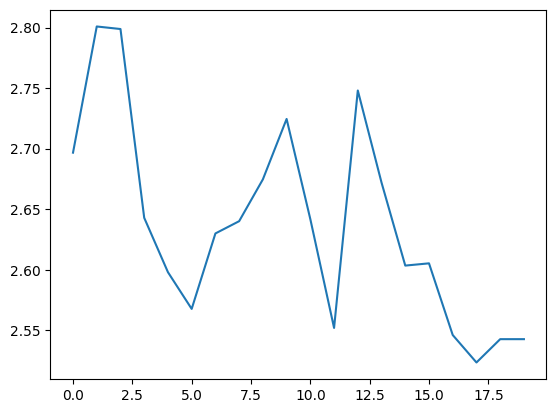

In [269]:
#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)


Using Adagrad like in assigment 4

In [70]:

from tensorflow.keras.layers import  Dense

# Créer le modèle RNN
model = Sequential()
dim = len(dict_notes_upd)
model.add(SimpleRNN(units=dim, input_shape=(5,dim)))  # Ajouter la couche RNN
model.add(Dense(units=dim, activation='softmax'))  # Ajouter la couche de sortie

model.summary()




c:\Users\anhly\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 82)             │        13,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 82)             │         6,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,336 (79.44 KB)

 Trainable params: 20,336 (79.44 KB)

 Non-trainable params: 0 (0.00 B)

In [257]:
# Compiler le modèle avec l'optimiseur AdaGrad comme dans l'assigment 4
opt = optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(training_one_hot, label_one_hot, epochs=10, batch_size=32)

Epoch 1/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.2395 - loss: 3.2260
Epoch 2/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.4276 - loss: 2.3139
Epoch 3/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.4687 - loss: 2.1339
Epoch 4/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.4897 - loss: 2.0477
Epoch 5/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.5047 - loss: 1.9814
Epoch 6/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.5151 - loss: 1.9327
Epoch 7/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.5252 - loss: 1.8911
Epoch 8/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.5344 - loss: 1.8568
Epoch 9/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.5396 - loss: 1.8269
Epoch 10/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.5451 - loss: 1.8044


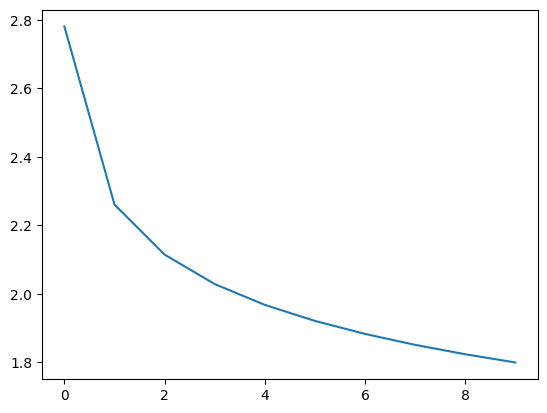

In [258]:
#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

Epoch 1/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.0725 - loss: 0.9868
Epoch 2/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.1424 - loss: 0.6791
Epoch 3/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - accuracy: 0.1587 - loss: 0.6303
Epoch 4/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.1710 - loss: 0.6028
Epoch 5/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.1810 - loss: 0.5833
Epoch 6/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.1902 - loss: 0.5681
Epoch 7/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.1996 - loss: 0.5556
Epoch 8/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - accuracy: 0.2054 - loss: 0.5450
Epoch 9/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.2172 - loss: 0.5359
Epoch 10/10
11537/11537 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.2230 - loss: 0.5278


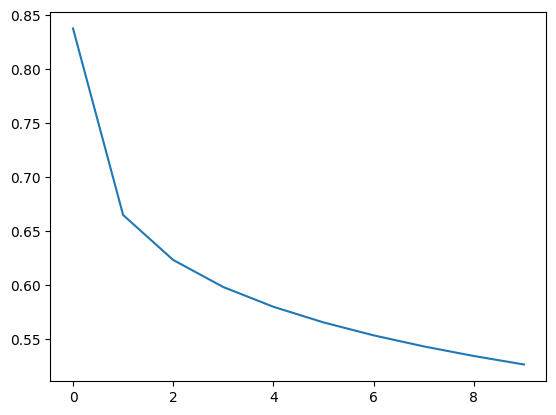

In [71]:
# Compiler le modèle avec l'optimiseur AdaGrad comme dans l'assigment 4
opt = optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(training_one_hot, label_one_hot, epochs=10, batch_size=32,class_weight=weights)
#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

In [253]:
##LSTM Architecture

from tensorflow.keras.layers import LSTM

model = Sequential()
dim = len(dict_notes_upd)
model.add(LSTM(units=dim, input_shape=(5,dim)))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(X_resampled, y_resampled, epochs=20, batch_size=100,class_weight=weights)  # Fit the model

#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

c:\Users\anhly\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 82)             │        54,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,120 (211.41 KB)

 Trainable params: 54,120 (211.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.0204 - loss: 2.9782
Epoch 2/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.0146 - loss: 2.8779
Epoch 3/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.0138 - loss: 2.8342
Epoch 4/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.0230 - loss: 2.8868
Epoch 5/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.0201 - loss: 2.8549
Epoch 6/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.0230 - loss: 2.7921
Epoch 7/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.0202 - loss: 2.6593
Epoch 8/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.0192 - loss: 2.7216
Epoch 9/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.0176 - loss: 2.8078
Epoch 10/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.0163 - loss: 2.8458
Epoch 11/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.0148 - loss: 2.8042
Epoch 12/20
3692/36

KeyboardInterrupt: 

In [259]:
model = Sequential()
dim = len(dict_notes_upd)
model.add(LSTM(units=dim, input_shape=(5,dim)))
model.summary()

model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100,class_weight=weights)  # Fit the model

#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

c:\Users\anhly\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 82)             │        54,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,120 (211.41 KB)

 Trainable params: 54,120 (211.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.0143 - loss: 2.9286
Epoch 2/20
3692/3692 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.0148 - loss: 2.8791
Epoch 3/20
  31/3692 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.0168 - loss: 2.9996

KeyboardInterrupt: 

2 layer comparison

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 5, 79)          │        12,561 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 79)             │        12,561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,122 (98.13 KB)

 Trainable params: 25,122 (98.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0367 - loss: 4.1697
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0459 - loss: 3.8515
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0389 - loss: 3.8951
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0182 - loss: 3.9800
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0262 - loss: 3.8701
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0348 - loss: 3.9108
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0165 - loss: 4.1065
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0117 - loss: 3.8995
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0150 - loss: 4.0319
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0398 - loss: 3.7990
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0580 - loss: 3.9414
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

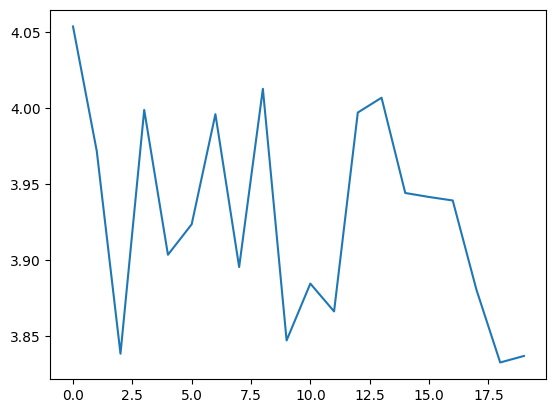

In [ ]:
model_rnn = Sequential()
dim = len(dict_notes)
model_rnn.add(SimpleRNN(units=dim, input_shape=(5,dim), return_sequences=True))  # First RNN layer with return_sequences=True
model_rnn.add(SimpleRNN(units=dim))  # Second RNN layer (no return_sequences=True as it's the last layer)
model_rnn.summary()

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
history_rnn = model_rnn.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100, class_weight=weights)

# Print the loss function for RNN model
loss_rnn = history_rnn.history['loss']
plt.plot(range(len(loss_rnn)), loss_rnn, label='RNN')

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5, 79)          │        50,244 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 79)             │        50,244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,488 (392.53 KB)

 Trainable params: 100,488 (392.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.0452 - loss: 4.1505
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0389 - loss: 3.8801
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0149 - loss: 3.9230
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0084 - loss: 3.9913
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0140 - loss: 4.0302
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0520 - loss: 3.7415
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0518 - loss: 4.1226
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0502 - loss: nan
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0202 - loss: nan
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0185 - loss: nan
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0207 - loss: nan
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/st

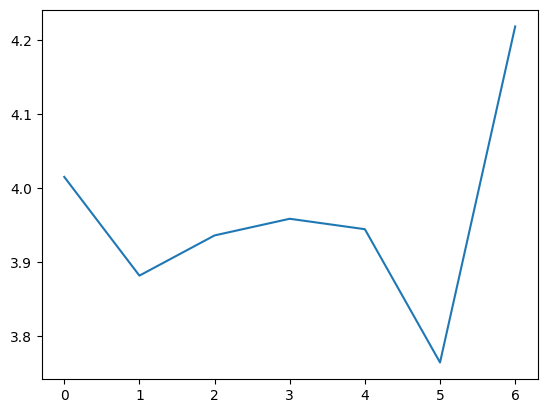

In [ ]:
model = Sequential()
dim = len(dict_notes_upd)
model.add(LSTM(units=dim, input_shape=(5,dim), return_sequences=True))  # First LSTM layer with return_sequences=True
model.add(LSTM(units=dim))  # Second LSTM layer (no return_sequences=True as it's the last layer)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100, class_weight=weights)  # Fit the model

# Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

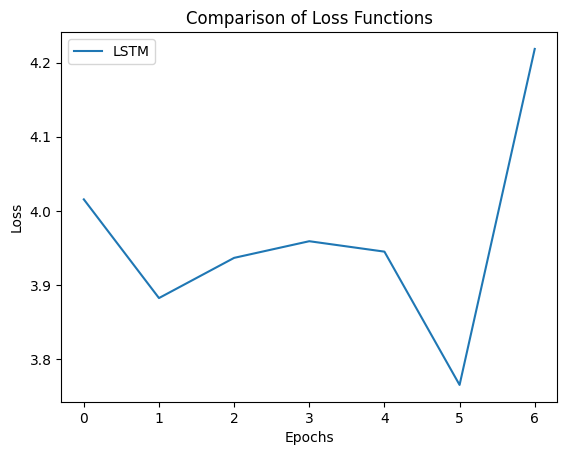

In [ ]:
# Plot the loss functions for both models
plt.plot(range(len(loss)), loss, label='LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Loss Functions')
plt.legend()
plt.show()


In [ ]:
#GRU architecture 

from tensorflow.keras.layers import GRU

model = Sequential()
dim = len(dict_notes)
model.add(GRU(units=dim, input_shape=(5, dim)))  # Replace LSTM with GRU
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100, class_weight=weights)  # Fit the model

# Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

Perform a Grid search to find the influence of different training parameters such as batch size and learning rate

In [ ]:
#optimizer Adam and RNN architecture 
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
dim=len(dict_notes_upd)
model = Sequential([
    SimpleRNN(units=64, input_shape=(5,dim))])
model.summary

In [35]:
#test for different batch size and different learning rates with a grid search 
# define the grid search parameters
batch_sizes = [10, 20, 40, 60, 80, 100]
learning_rates = [0.001, 0.01, 0.1]

results = {}
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Build and compile model
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Train model
        history = model.fit(training_one_hot, label_one_hot, batch_size=batch_size, epochs=10, validation_data=(X_val, y_val))
        
        # Evaluate performance
        loss, accuracy = model.evaluate(X_val, y_val)
     
        results[(batch_size, learning_rate)] = {'loss': loss, 'accuracy': accuracy}

# Analyze results and select best hyperparameters
best_params = max(results, key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_params]['accuracy']

AttributeError: 'KerasClassifier' object has no attribute 'compile'